In [1]:
import os
import random

import numpy as np
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

random.seed(0)

In [ ]:
from pycocotools.coco import COCO
json_path = "/home/sjtu/scratch/tongzhao/e2ec/data/coco/annotations/instances_train2017.json"
img_path = "/home/sjtu/scratch/tongzhao/e2ec/data/coco/train2017"
coco = COCO(annotation_file=json_path)
# 获取对应图像id的所有annotations idx信息
img_id = 295695
ann_ids = coco.getAnnIds(imgIds=img_id)
# ann_ids = 7880
# 根据annotations idx信息获取所有标注信息
targets = coco.loadAnns(ann_ids)

In [2]:
json_path = "/home/sjtu/scratch/tongzhao/e2ec/data/coco/annotations/instances_train2017.json"
img_path = "/home/sjtu/scratch/tongzhao/e2ec/data/coco/train2017"

loading annotations into memory...
Done (t=13.54s)
creating index...
index created!
number of images: 118287


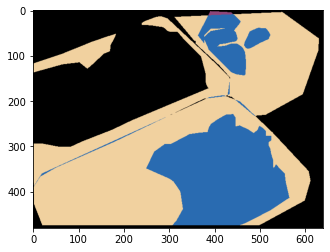

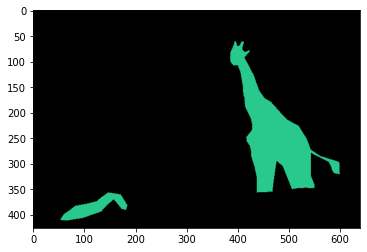

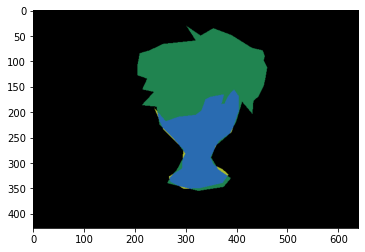

In [3]:
# random pallette
pallette = [0, 0, 0] + [random.randint(0, 255) for _ in range(255*3)]

# load coco data
coco = COCO(annotation_file=json_path)

# get all image index info
ids = list(sorted(coco.imgs.keys()))
print("number of images: {}".format(len(ids)))

# get all coco class labels
coco_classes = dict([(v["id"], v["name"]) for k, v in coco.cats.items()])

# 遍历前三张图像
for img_id in ids[:3]:
    # 获取对应图像id的所有annotations idx信息
    ann_ids = coco.getAnnIds(imgIds=img_id)
    # 根据annotations idx信息获取所有标注信息
    targets = coco.loadAnns(ann_ids)

    # get image file name
    path = coco.loadImgs(img_id)[0]['file_name']
    # read image
    img = Image.open(os.path.join(img_path, path)).convert('RGB')
    img_w, img_h = img.size

    masks = []
    cats = []
    for target in targets:
        cats.append(target["category_id"])  # get object class id
        polygons = target["segmentation"]   # get object polygons
        rles = coco_mask.frPyObjects(polygons, img_h, img_w)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = mask.any(axis=2)
        masks.append(mask)

    cats = np.array(cats, dtype=np.int32)
    if masks:
        masks = np.stack(masks, axis=0)
    else:
        masks = np.zeros((0, height, width), dtype=np.uint8)

    # merge all instance masks into a single segmentation map
    # with its corresponding categories
    target = (masks * cats[:, None, None]).max(axis=0)
    # discard overlapping instances
    target[masks.sum(0) > 1] = 255
    target = Image.fromarray(target.astype(np.uint8))

    target.putpalette(pallette)
    plt.imshow(target)
    plt.show()

In [6]:
# 获取对应图像id的所有annotations idx信息
img_id = 295695
ann_ids = coco.getAnnIds(imgIds=img_id)
# ann_ids = 7880
# 根据annotations idx信息获取所有标注信息
targets = coco.loadAnns(ann_ids)



# get image file name
path = coco.loadImgs(img_id)[0]['file_name']
# read image
img = Image.open(os.path.join(img_path, path)).convert('RGB')
img_w, img_h = img.size

[{'segmentation': [[4.31, 289.08, 172.58, 302.02, 185.53, 348.04, 185.53, 355.24, 168.27, 358.11, 156.76, 359.55, 152.45, 371.06, 139.51, 389.75, 136.63, 399.82, 133.75, 404.13, 133.75, 405.57, 5.75, 412.76]], 'area': 18015.02565, 'iscrowd': 0, 'image_id': 295695, 'bbox': [4.31, 289.08, 181.22, 123.68], 'category_id': 6, 'id': 166559}, {'segmentation': [[212.92, 201.28, 207.53, 196.79, 202.6, 183.78, 205.29, 168.07, 215.16, 155.95, 229.98, 156.85, 236.71, 163.13, 238.06, 177.49, 231.77, 194.1, 219.2, 201.73, 213.37, 201.73]], 'area': 1237.3328000000004, 'iscrowd': 0, 'image_id': 295695, 'bbox': [202.6, 155.95, 35.46, 45.78], 'category_id': 85, 'id': 339407}, {'segmentation': [[284.61, 160.58, 290.06, 166.3, 291.7, 170.66, 293.33, 175.29, 293.33, 183.47, 293.88, 191.1, 292.52, 197.09, 289.25, 199.82, 283.25, 200.91, 278.35, 196.82, 275.08, 184.29, 273.99, 181.02, 273.17, 174.2, 273.17, 170.93, 273.99, 166.85, 276.71, 162.49, 279.71, 161.94, 281.34, 160.85]], 'area': 643.7342499999993, '

In [ ]:
len(targets)

In [7]:
targets[0]

{'segmentation': [[4.31,
   289.08,
   172.58,
   302.02,
   185.53,
   348.04,
   185.53,
   355.24,
   168.27,
   358.11,
   156.76,
   359.55,
   152.45,
   371.06,
   139.51,
   389.75,
   136.63,
   399.82,
   133.75,
   404.13,
   133.75,
   405.57,
   5.75,
   412.76]],
 'area': 18015.02565,
 'iscrowd': 0,
 'image_id': 295695,
 'bbox': [4.31, 289.08, 181.22, 123.68],
 'category_id': 6,
 'id': 166559}

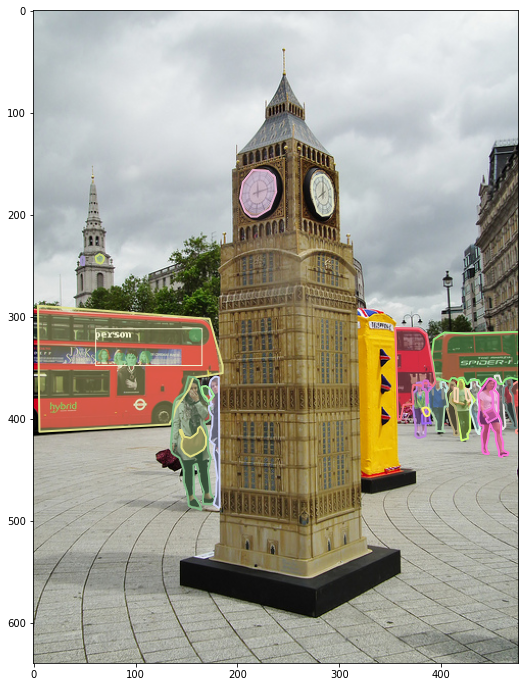

In [5]:
masks = []
cats = []
for target in targets:
    cats.append(target["category_id"])  # get object class id
    polygons = target["segmentation"]   # get object polygons
    rles = coco_mask.frPyObjects(polygons, img_h, img_w)
    mask = coco_mask.decode(rles)
    if len(mask.shape) < 3:
        mask = mask[..., None]
    mask = mask.any(axis=2)
    masks.append(mask)

cats = np.array(cats, dtype=np.int32)
if masks:
    masks = np.stack(masks, axis=0)
else:
    masks = np.zeros((0, height, width), dtype=np.uint8)

# merge all instance masks into a single segmentation map
# with its corresponding categories
mtarget = (masks * cats[:, None, None]).max(axis=0)
# discard overlapping instances
mtarget[masks.sum(0) > 1] = 255
mtarget = Image.fromarray(mtarget.astype(np.uint8))

# plt.imshow(img)
# plt.show()

draw = ImageDraw.Draw(img)

x, y, w, h = target["bbox"]
x1, y1, x2, y2 = x, y, int(x + w), int(y + h)
draw.rectangle((x1, y1, x2, y2))
draw.text((x1, y1), coco_classes[target["category_id"]])
s=2
plt.figure(figsize=(10*s,6*s))
plt.imshow(img)
coco.showAnns(targets)
plt.show()